# Prediction of Solar power

Data provided open source at:
https://www.kaggle.com/datasets/dilipkola/shell-ai-solar-irradiance-prediction-hackathon?group=bookmarked

Goals of analysis:
* Predict Global Irradiance for next 2 hours at 10 minute intervals given at least 2 hours of weather data

Data:
* Data is given every minute meaning at least 120 observations (2hours) must be used to output 12 data points (10 minute increments)
* I am going to start by predicting Solar IR in 30 minutes

### Housekeeping

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as dt
import os

In [3]:
os.getcwd()

'C:\\Users\\emlach\\Documents\\Courses\\Y3S2\\ML\\SolarNN'

In [4]:
train = pd.read_csv('./archive/train.csv')
test = pd.read_csv('./archive/test.csv')

### Data Exploration

In [39]:
floatcols = train.select_dtypes(include=[float,int]).columns
train.columns

Index(['DATE (YYYY/MM/DD)', 'MST', 'Global CMP22 (vent/cor) [W/m^2]',
       'Direct sNIP [W/m^2]', 'Azimuth Angle [degrees]',
       'Tower Dry Bulb Temp [deg C]', 'Tower Wet Bulb Temp [deg C]',
       'Tower Dew Point Temp [deg C]', 'Tower RH [%]', 'Total Cloud Cover [%]',
       'Peak Wind Speed @ 6ft [m/s]', 'Avg Wind Direction @ 6ft [deg from N]',
       'Station Pressure [mBar]', 'Precipitation (Accumulated) [mm]',
       'Snow Depth [cm]', 'Moisture', 'Albedo (CMP11)'],
      dtype='object')

Dictionary for important column names:
* Wet bulb is measure of heat stress in direct sunlight -- mixture of temp, humidity, wind speed, sun angle, and cloud cover
    * (Would be interesting to look at the change in dWB/dt)

In [90]:
data= {
        'date':'DATE (YYYY/MM/DD)',
        'time':'MST',
        'label':'Global CMP22 (vent/cor) [W/m^2]',
        'WB':'Tower Wet Bulb Temp [deg C]'
    }

Adding in a datetime column

In [ ]:
combinedt = lambda datetime: dt.datetime.strptime(datetime[0]+' '+datetime[1], '%Y/%m/%d %H:%M')

train['datetime'] = train[[data['date'],data['time']]].apply(combinedt, axis=1)

There is no sun at night, these values are included in the df with many negative values:
Around 50% of the label data is during the night (makes sense)

In [85]:
def negative(a):
    if a < 0:
        return 0
    else:
        return a

train[data['label']] = train[data['label']].map(negative)

<AxesSubplot:>

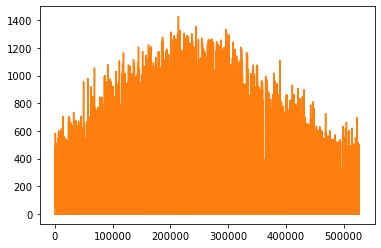

In [121]:
def derivative(df, keycol, timecol):
    derv = df[keycol].diff()/train[timecol].diff().dt.seconds
    return derv

# derivative of 
derivative(train,data['WB'],'datetime').plot()
train[data['label']].reset_index(drop=True).plot()

    

In [89]:
train[floatcols].var()

Global CMP22 (vent/cor) [W/m^2]           84239.312133
Direct sNIP [W/m^2]                      135279.332824
Azimuth Angle [degrees]                   10155.004211
Tower Dry Bulb Temp [deg C]                 114.555567
Tower Wet Bulb Temp [deg C]                  48.523178
Tower Dew Point Temp [deg C]                 53.873623
Tower RH [%]                                585.462848
Total Cloud Cover [%]                    187299.135060
Peak Wind Speed @ 6ft [m/s]                   4.332387
Avg Wind Direction @ 6ft [deg from N]     13623.550895
Station Pressure [mBar]                      26.162137
Precipitation (Accumulated) [mm]              3.501332
Snow Depth [cm]                           39706.048881
Moisture                                      0.058735
Albedo (CMP11)                                0.034628
dtype: float64

<AxesSubplot:>

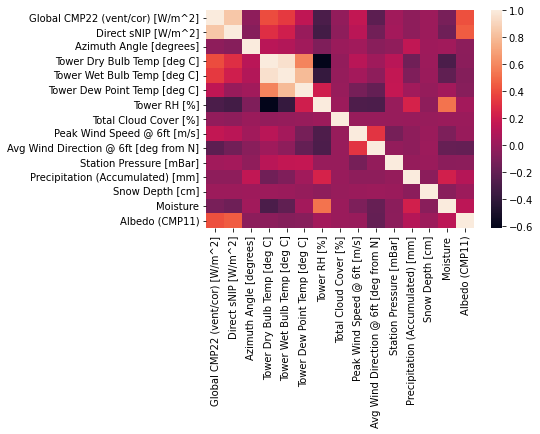

In [33]:
sns.heatmap(train[floatcols].corr())

# Pipeline

In [ ]:
def neg(a):
    """ replaces negative values with zero """
    if a < 0:
        return 0
    else:
        return a


class Pipeline:
    """ pipeline to clean solar radiation data """
    def __init__(self, data, settings):
        self.data = data
        self.settings = settings
    
    def clean_data(self):
        # creating a datetime column
        combinedt = lambda datetime: dt.datetime.strptime(datetime[0]+' '+datetime[1], '%Y/%m/%d %H:%M')
        self.data['datetime'] = self.data[[self.settings['date'],self.settings['time']]].apply(combinedt, axis=1)

        # replace all negative sol ir with 0
        self.data[self.settings['label'] = self.data[self.settings['label']].map(neg)
                  
    def derivative(self, column)
        colname = 'd{col}'.format(col=self.settings[column])
        self.data[colname] = df[self.settings[column]].diff()/train['datetime'].diff().dt.seconds


'dhello'